## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.280318 -1.247951  0.914504  0.479662  1.419169 -0.037274
1  0.404871 -0.175194  0.369074 -0.330648  1.346461  0.464423
2 -0.429229  1.228232 -0.715938 -0.272356 -0.900238  0.299870
3  0.621000 -1.172999  0.744996  1.197779  0.212664  0.022140
4  1.096332 -1.425325 -0.674625  0.732453 -1.460168 -1.002050


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0162684	total: 57.3ms	remaining: 57.2s
1:	learn: 1.0062792	total: 57.7ms	remaining: 28.8s
2:	learn: 0.9946443	total: 58.3ms	remaining: 19.4s
3:	learn: 0.9817098	total: 58.8ms	remaining: 14.6s
4:	learn: 0.9710543	total: 59.4ms	remaining: 11.8s
5:	learn: 0.9602217	total: 59.8ms	remaining: 9.91s
6:	learn: 0.9478206	total: 60.3ms	remaining: 8.55s
7:	learn: 0.9377518	total: 60.8ms	remaining: 7.54s
8:	learn: 0.9278870	total: 61.5ms	remaining: 6.77s
9:	learn: 0.9173414	total: 62ms	remaining: 6.13s
10:	learn: 0.9064074	total: 62.4ms	remaining: 5.61s
11:	learn: 0.8948456	total: 62.9ms	remaining: 5.18s
12:	learn: 0.8835102	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8743897	total: 64ms	remaining: 4.51s
14:	learn: 0.8673739	total: 64.5ms	remaining: 4.23s
15:	learn: 0.8579583	total: 65.2ms	remaining: 4.01s
16:	learn: 0.8495285	total: 65.8ms	remaining: 3.8s
17:	learn: 0.8398037	total: 66.2ms	remaining: 3.61s
18:	learn: 0.8311818	total: 66.6ms	remaining: 3.4

108:	learn: 0.3554657	total: 108ms	remaining: 887ms
109:	learn: 0.3522037	total: 109ms	remaining: 883ms
110:	learn: 0.3491910	total: 110ms	remaining: 879ms
111:	learn: 0.3462856	total: 110ms	remaining: 873ms
112:	learn: 0.3428116	total: 111ms	remaining: 869ms
113:	learn: 0.3394132	total: 111ms	remaining: 864ms
114:	learn: 0.3367464	total: 112ms	remaining: 858ms
115:	learn: 0.3335066	total: 112ms	remaining: 853ms
116:	learn: 0.3311487	total: 113ms	remaining: 849ms
117:	learn: 0.3284237	total: 113ms	remaining: 844ms
118:	learn: 0.3253556	total: 113ms	remaining: 840ms
119:	learn: 0.3226523	total: 114ms	remaining: 835ms
120:	learn: 0.3202367	total: 114ms	remaining: 831ms
121:	learn: 0.3177336	total: 115ms	remaining: 828ms
122:	learn: 0.3150380	total: 116ms	remaining: 826ms
123:	learn: 0.3125986	total: 116ms	remaining: 821ms
124:	learn: 0.3100210	total: 117ms	remaining: 816ms
125:	learn: 0.3070479	total: 117ms	remaining: 812ms
126:	learn: 0.3044190	total: 118ms	remaining: 808ms
127:	learn: 

273:	learn: 0.0972196	total: 187ms	remaining: 496ms
274:	learn: 0.0964558	total: 188ms	remaining: 495ms
275:	learn: 0.0958147	total: 188ms	remaining: 494ms
276:	learn: 0.0952375	total: 189ms	remaining: 493ms
277:	learn: 0.0946212	total: 189ms	remaining: 492ms
278:	learn: 0.0939954	total: 190ms	remaining: 491ms
279:	learn: 0.0934014	total: 190ms	remaining: 489ms
280:	learn: 0.0926555	total: 191ms	remaining: 488ms
281:	learn: 0.0919815	total: 191ms	remaining: 486ms
282:	learn: 0.0913860	total: 192ms	remaining: 485ms
283:	learn: 0.0907095	total: 192ms	remaining: 484ms
284:	learn: 0.0901033	total: 192ms	remaining: 483ms
285:	learn: 0.0894758	total: 193ms	remaining: 482ms
286:	learn: 0.0888759	total: 193ms	remaining: 480ms
287:	learn: 0.0883015	total: 194ms	remaining: 479ms
288:	learn: 0.0877503	total: 194ms	remaining: 478ms
289:	learn: 0.0872196	total: 195ms	remaining: 477ms
290:	learn: 0.0869607	total: 195ms	remaining: 476ms
291:	learn: 0.0863881	total: 196ms	remaining: 474ms
292:	learn: 

499:	learn: 0.0355243	total: 292ms	remaining: 292ms
500:	learn: 0.0354842	total: 293ms	remaining: 291ms
501:	learn: 0.0352881	total: 293ms	remaining: 291ms
502:	learn: 0.0352488	total: 294ms	remaining: 290ms
503:	learn: 0.0351142	total: 294ms	remaining: 289ms
504:	learn: 0.0349845	total: 295ms	remaining: 289ms
505:	learn: 0.0348190	total: 295ms	remaining: 288ms
506:	learn: 0.0347512	total: 295ms	remaining: 287ms
507:	learn: 0.0345990	total: 296ms	remaining: 286ms
508:	learn: 0.0343646	total: 297ms	remaining: 286ms
509:	learn: 0.0342429	total: 297ms	remaining: 285ms
510:	learn: 0.0341180	total: 298ms	remaining: 285ms
511:	learn: 0.0339991	total: 298ms	remaining: 284ms
512:	learn: 0.0338829	total: 298ms	remaining: 283ms
513:	learn: 0.0337603	total: 299ms	remaining: 283ms
514:	learn: 0.0336456	total: 299ms	remaining: 282ms
515:	learn: 0.0335083	total: 300ms	remaining: 281ms
516:	learn: 0.0333884	total: 300ms	remaining: 280ms
517:	learn: 0.0332784	total: 300ms	remaining: 280ms
518:	learn: 

663:	learn: 0.0183916	total: 371ms	remaining: 188ms
664:	learn: 0.0183305	total: 372ms	remaining: 187ms
665:	learn: 0.0182902	total: 372ms	remaining: 187ms
666:	learn: 0.0182358	total: 373ms	remaining: 186ms
667:	learn: 0.0181822	total: 373ms	remaining: 185ms
668:	learn: 0.0181339	total: 374ms	remaining: 185ms
669:	learn: 0.0180729	total: 374ms	remaining: 184ms
670:	learn: 0.0180251	total: 375ms	remaining: 184ms
671:	learn: 0.0179558	total: 375ms	remaining: 183ms
672:	learn: 0.0178968	total: 375ms	remaining: 182ms
673:	learn: 0.0178501	total: 376ms	remaining: 182ms
674:	learn: 0.0178088	total: 376ms	remaining: 181ms
675:	learn: 0.0177563	total: 377ms	remaining: 181ms
676:	learn: 0.0176891	total: 378ms	remaining: 180ms
677:	learn: 0.0176437	total: 378ms	remaining: 180ms
678:	learn: 0.0175784	total: 379ms	remaining: 179ms
679:	learn: 0.0175337	total: 379ms	remaining: 178ms
680:	learn: 0.0174836	total: 379ms	remaining: 178ms
681:	learn: 0.0174265	total: 380ms	remaining: 177ms
682:	learn: 

883:	learn: 0.0095644	total: 476ms	remaining: 62.5ms
884:	learn: 0.0095458	total: 477ms	remaining: 61.9ms
885:	learn: 0.0094968	total: 477ms	remaining: 61.4ms
886:	learn: 0.0094785	total: 478ms	remaining: 60.9ms
887:	learn: 0.0094496	total: 478ms	remaining: 60.3ms
888:	learn: 0.0094316	total: 479ms	remaining: 59.8ms
889:	learn: 0.0094044	total: 479ms	remaining: 59.2ms
890:	learn: 0.0093567	total: 479ms	remaining: 58.6ms
891:	learn: 0.0093312	total: 480ms	remaining: 58.1ms
892:	learn: 0.0093134	total: 480ms	remaining: 57.6ms
893:	learn: 0.0092666	total: 481ms	remaining: 57ms
894:	learn: 0.0092364	total: 481ms	remaining: 56.5ms
895:	learn: 0.0092188	total: 482ms	remaining: 55.9ms
896:	learn: 0.0091995	total: 482ms	remaining: 55.4ms
897:	learn: 0.0091538	total: 483ms	remaining: 54.8ms
898:	learn: 0.0091365	total: 483ms	remaining: 54.3ms
899:	learn: 0.0091110	total: 483ms	remaining: 53.7ms
900:	learn: 0.0090922	total: 484ms	remaining: 53.2ms
901:	learn: 0.0090474	total: 484ms	remaining: 52

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

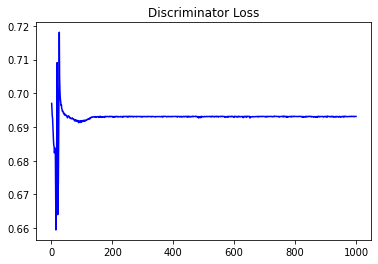

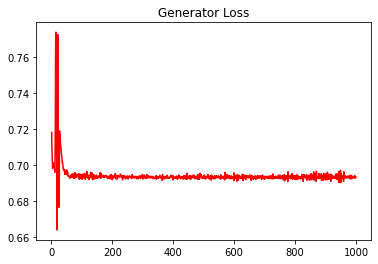

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22982689843392873


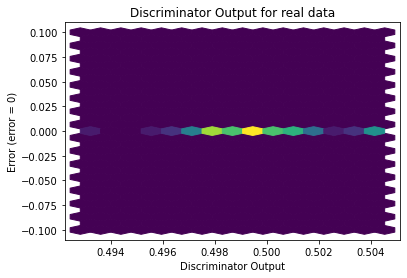

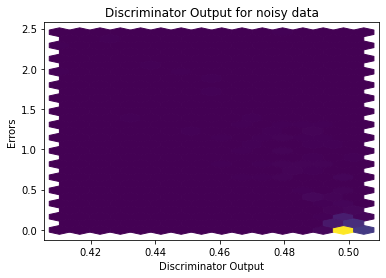

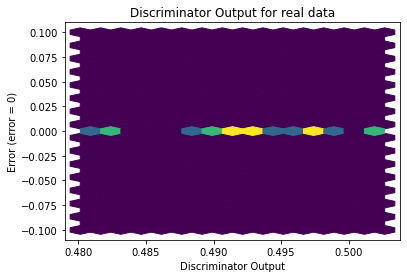

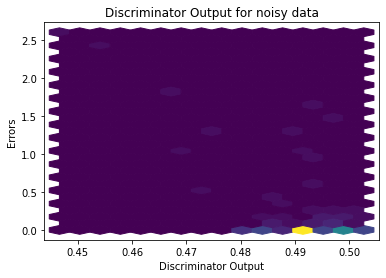

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


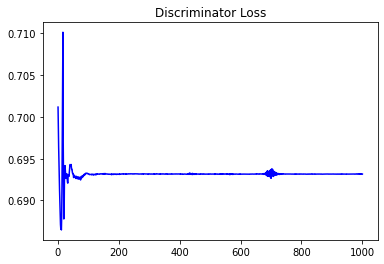

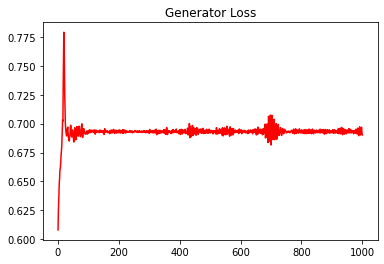

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2310948370588541


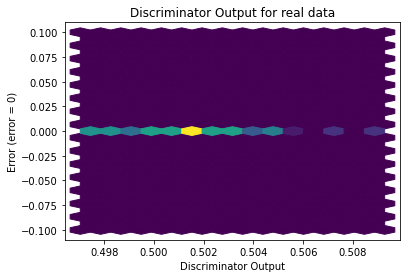

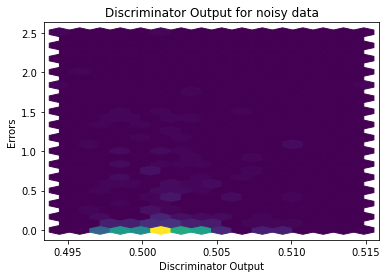

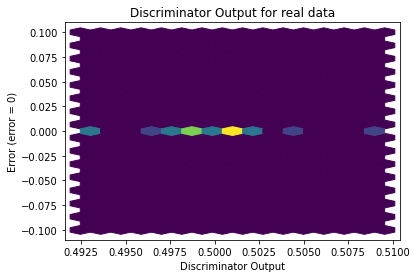

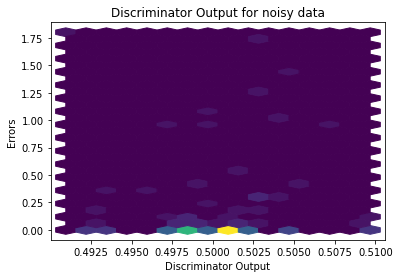

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3392]], requires_grad=True)
